<a href="https://colab.research.google.com/github/aburameshotaro/titanic_data_analysis/blob/master/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis of date connected to sinking of Titanic

##Import of libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Loading data

In [2]:
tit = sns.load_dataset('titanic')

##Preprocesing data

###Geting basic info about dataset

In [22]:
tit.info()

tit = tit[tit['embark_town'].notnull()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          712 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  deck         201 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        889 non-null    object  
 14  alone        889 non-null    bool    
 15  qbin         889 non-null    category
 16  Fare groups  889 non-null    category
dtypes: bool(2), category(4), float64(2), int64(4), object(5)
memory usage: 12

##Analysis

###How many peoples survived from different classes and embark towns (percentage)
As we see on the diagram below, the highest survival chance was in the first and the second class. People say that everybody is equal when it comes to death, but apparently it is not the case. People with more money have bigger chance to survive disasters. People that embarked in Southampton had smaller chance to survive as we see on the plot. Current data have not enough attributes to verify why is that.

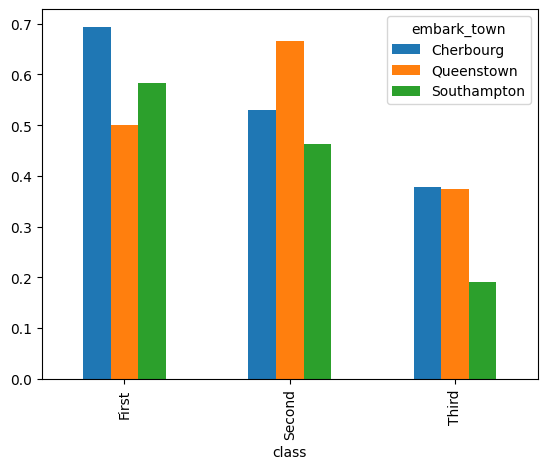

In [10]:
temp_males = tit[tit['who']=='man']
temp_females = tit[tit['who']=='woman']

city_class = tit.pivot_table(columns='embark_town', index='class',
                             values='survived', aggfunc='mean')

_ = city_class.plot(kind='bar')

##Chances of survial (being alone and sex)
The diagrams belows show that women had greater chance to survive and the chance is almost the same no matter if she was alone on the ship or with companion. There is however small tendency, that alone women had more luck.

The situation for men is completely different. Not only had they lower chance to survive beacuse they were men, but also if they were alone.

In [ ]:
alone_in_the_city_males = temp_males.pivot_table(values='survived',
         index='embark_town', columns='alone', aggfunc= 'mean')
alone_in_the_city_females = temp_females.pivot_table(values='survived',
         index='embark_town', columns='alone', aggfunc= 'mean')
_ = alone_in_the_city_males.plot(kind='bar',
            title='How being alone affects chances to survive (men)')
_ = alone_in_the_city_females.plot(kind='bar',
            title='How being alone affects chances to survive (women)')

##Pay to win
Continuing my previous conclusions, we see on the diagram below that the more one paid for his ticket, the bigger are his or hers chances of survival. The trend is visible both men or women. However it is more stable with men, as if the money paid were only one factor that decided if man would survive or not.


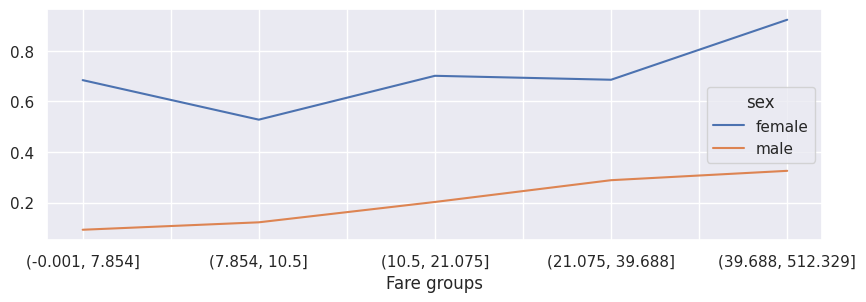

In [20]:
fare = tit['fare']
tit['Fare groups'] = pd.qcut(fare, 5)
pay_to_survive = tit.pivot_table(index = 'Fare groups',
                      columns='sex', values = 'survived', aggfunc='mean')
_ = pay_to_survive.plot(figsize=(10,3))

##When it comes to payments people who survived
Elder people and young people chose cheaper fare. The most for their tickets paid people between 20 and 70 years old.

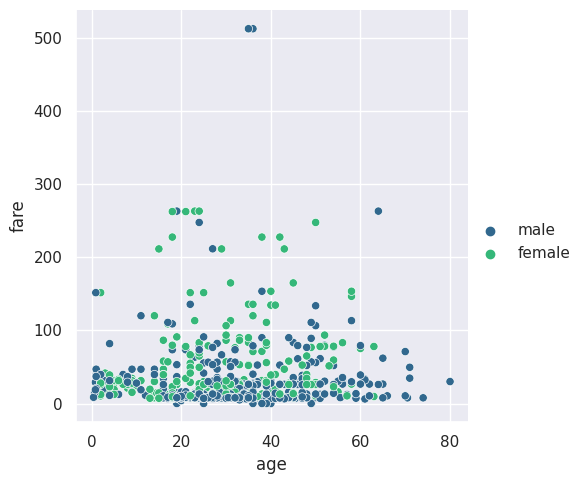

In [24]:
sns.set()
_ = sns.relplot(data=tit, x='age', y='fare', palette='viridis',
            hue=tit.sex.tolist())